In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [260]:
data=pd.read_csv('C:\\Users\\91735\\Downloads\\mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [261]:
##basic information on the dataset

In [262]:
data.shape #dimensions of the data

(8124, 23)

In [263]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

all are of object datatype

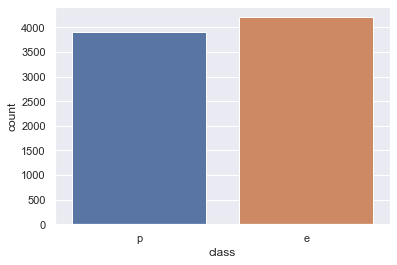

In [265]:
sns.countplot(data=data,x='class')
sns.set(style='darkgrid')

In [266]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [267]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Preprocessing

In [268]:
#checking null values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

no null values are present

In [269]:
##no of unique values present in each columns
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

Class column is response and rest columns are predictors.

In [270]:
##The dataset contains the feature stalk root that has some missing values,denoted by ?,so we exclude that
df = df[df['stalk-root'] != '?']

In [271]:
##df=data.copy()

In [272]:
##Seprating Predictors and Response
X=df.drop('class',axis=1) #Predictors
y=df['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


# Encoding categorical data

In [273]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [274]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,2,0,...,2,5,5,0,0,1,3,1,3,5
1,5,2,7,1,0,1,0,0,2,0,...,2,5,5,0,0,1,3,2,2,1
2,0,2,6,1,3,1,0,0,3,0,...,2,5,5,0,0,1,3,2,2,3
3,5,3,6,1,6,1,0,1,3,0,...,2,5,5,0,0,1,3,1,3,5
4,5,2,3,0,5,1,1,0,2,1,...,2,5,5,0,0,1,0,2,0,1


In [275]:
y

array([1, 0, 0, ..., 0, 1, 1])

Poisonous = 1
    
    
   Eatable = 0

# Dummy encoding

In [276]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_1,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5
0,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Splitting the dataset into the Training set and Test set

In [277]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

Feature Scaling

In [278]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Applying PCA with n_components = 2

In [279]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# ML Algorithms

In [280]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [281]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

Logistic Regression Model

In [282]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

In [283]:
##Logistic Regression Training Results
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8463

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2441
           1       0.97      0.62      0.75      1509

    accuracy                           0.85      3950
   macro avg       0.89      0.80      0.82      3950
weighted avg       0.87      0.85      0.84      3950


Confusion Matrix:
[[2408   33]
 [ 574  935]]

Average Accuracy:	0.8461

Standard Deviation:	0.0171


In [284]:
##Logistic Regression Test Results
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8518

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1047
           1       0.98      0.63      0.76       647

    accuracy                           0.85      1694
   macro avg       0.89      0.81      0.83      1694
weighted avg       0.87      0.85      0.84      1694


Confusion Matrix:
[[1038    9]
 [ 242  405]]



Support Vecor (SVC) Classification Model

In [285]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42)

classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

In [286]:
##SVC Training Results
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8734

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2441
           1       0.99      0.67      0.80      1509

    accuracy                           0.87      3950
   macro avg       0.91      0.84      0.85      3950
weighted avg       0.89      0.87      0.87      3950


Confusion Matrix:
[[2434    7]
 [ 493 1016]]

Average Accuracy:	0.8684

Standard Deviation:	0.0167


In [287]:
##SVC Test Results
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8707

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1047
           1       0.99      0.67      0.80       647

    accuracy                           0.87      1694
   macro avg       0.91      0.83      0.85      1694
weighted avg       0.89      0.87      0.86      1694


Confusion Matrix:
[[1042    5]
 [ 214  433]]



KNN Model

In [288]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

In [289]:
##KNN Training Results
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9476

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2441
           1       0.97      0.89      0.93      1509

    accuracy                           0.95      3950
   macro avg       0.95      0.94      0.94      3950
weighted avg       0.95      0.95      0.95      3950


Confusion Matrix:
[[2397   44]
 [ 163 1346]]

Average Accuracy:	0.9276

Standard Deviation:	0.0161


In [290]:
##KNN Test Results
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9197

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1047
           1       0.92      0.86      0.89       647

    accuracy                           0.92      1694
   macro avg       0.92      0.91      0.91      1694
weighted avg       0.92      0.92      0.92      1694


Confusion Matrix:
[[1000   47]
 [  89  558]]



Decision Tree Classification Model

In [291]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy',random_state=42)
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

In [292]:
##Decision Tree Training Results
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2441
           1       1.00      1.00      1.00      1509

    accuracy                           1.00      3950
   macro avg       1.00      1.00      1.00      3950
weighted avg       1.00      1.00      1.00      3950


Confusion Matrix:
[[2441    0]
 [   0 1509]]

Average Accuracy:	0.9084

Standard Deviation:	0.0127


In [293]:
##Decision Tree Test Results
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9144

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1047
           1       0.89      0.88      0.89       647

    accuracy                           0.91      1694
   macro avg       0.91      0.91      0.91      1694
weighted avg       0.91      0.91      0.91      1694


Confusion Matrix:
[[978  69]
 [ 76 571]]



Random Forest Classification Model

In [294]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

In [295]:
##Random Forest Training Results
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9987

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2441
           1       1.00      1.00      1.00      1509

    accuracy                           1.00      3950
   macro avg       1.00      1.00      1.00      3950
weighted avg       1.00      1.00      1.00      3950


Confusion Matrix:
[[2440    1]
 [   4 1505]]

Average Accuracy:	0.9309

Standard Deviation:	0.0131


In [296]:
##Random Forest Test Results
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9292

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1047
           1       0.95      0.86      0.90       647

    accuracy                           0.93      1694
   macro avg       0.93      0.92      0.92      1694
weighted avg       0.93      0.93      0.93      1694


Confusion Matrix:
[[1016   31]
 [  89  558]]



Naive Bayes Classification Model

In [297]:
##gaussian naive bayes
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

In [298]:
##Naive Bayes Training Results
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8392

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2441
           1       0.93      0.62      0.75      1509

    accuracy                           0.84      3950
   macro avg       0.87      0.80      0.82      3950
weighted avg       0.85      0.84      0.83      3950


Confusion Matrix:
[[2372   69]
 [ 566  943]]

Average Accuracy:	0.8397

Standard Deviation:	0.0184


In [299]:
##Naive Bayes Test Results
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8442

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1047
           1       0.94      0.63      0.76       647

    accuracy                           0.84      1694
   macro avg       0.87      0.80      0.82      1694
weighted avg       0.86      0.84      0.84      1694


Confusion Matrix:
[[1020   27]
 [ 237  410]]



In [300]:
##bernollis naive bayes
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

In [301]:
##bernollis Naive Bayes Training Results
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8461

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2441
           1       0.96      0.63      0.76      1509

    accuracy                           0.85      3950
   macro avg       0.88      0.80      0.82      3950
weighted avg       0.87      0.85      0.84      3950


Confusion Matrix:
[[2398   43]
 [ 565  944]]

Average Accuracy:	0.8461

Standard Deviation:	0.0167


In [302]:
##Bernollis Naive Bayes Test Results
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8489

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1047
           1       0.95      0.64      0.76       647

    accuracy                           0.85      1694
   macro avg       0.88      0.81      0.83      1694
weighted avg       0.87      0.85      0.84      1694


Confusion Matrix:
[[1026   21]
 [ 235  412]]



Random forest model is the best one with 99% accuracy in training and 93% in testing